### Graph Theory Assignment 3
> Kaushal Lodd - BT19CSE052

> Saarang Rajguru - BT19CSE092

*Importing Libraries*

In [248]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

*Implementing Important Functions*

In [249]:
# Calculate the distance between two data points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))
# print(euclidean_distance(np.array([1, 2, 3]), np.array([4, 5, 6])))

*Implementing Class Node*

In [250]:
# A class that represents the nodes
class Node:

    # Constructor to initialize the node
    def __init__(self, nodeInfo):
        self.patientID = nodeInfo[0]
        self.data = nodeInfo[1:]

    # Method to evaluate the equality of two nodes
    def __eq__(self, other):
        return self.patientID == other.patientID

    # Method to return the hash value of the node
    def __hash__(self):
        return hash(self.patientID)

    # Method to return the string representation of the node
    def __repr__(self):
        return f"Patient {self.patientID}"

*Implementing Class Graph*

In [251]:
# A class that represents the graph
class Graph:

    # Constructor to initialize the graph
    def __init__(self, nodes):
        self.nodes = [Node(nodeInfo) for nodeInfo in nodes]
        self.adjacency_matrix = None
        self.adjacency_list = {}
        for node in self.nodes:
            self.adjacency_list[node] = []
        self.visited = set()
        self.queue = []

    # Method to compute the adjacency matrix of the graph
    def compute_adjacency_matrix(self):
        self.adjacency_matrix = np.zeros((len(self.nodes), len(self.nodes)))
        for i in range(len(self.nodes)):
            for j in range(len(self.nodes)):
                self.adjacency_matrix[i][j] = euclidean_distance(self.nodes[i].data, self.nodes[j].data)

    # Method to add a node to the graph
    def add_node(self, node):
        self.nodes.append(node)
        self.adjacency_list[node] = []

    # Method to add an edge between two nodes
    def add_edge(self, node1, node2):
        self.adjacency_list[node1].append(node2)
        self.adjacency_list[node2].append(node1)

    # Method to remove an edge between two nodes
    def remove_edge(self, node1, node2):
        self.adjacency_list[node1].remove(node2)
        self.adjacency_list[node2].remove(node1)

    # Method to return the edges of the graph
    def get_edges(self):
        edges = []
        for node in self.adjacency_list:
            for neighbour in self.adjacency_list[node]:
                if {node, neighbour} not in edges:
                    edges.append({node, neighbour})
        return edges

    # Method to return the neighbours of a node
    def get_neighbours(self, node):
        return self.adjacency_list[node]

    # Method to return the MST of the graph using Prim's algorithm
    def get_mst(self):
        self.visited = set()
        mst = Graph([])
        mst.add_node(self.nodes[0])
        self.visited.add(self.nodes[0])
        while len(mst.nodes) != len(self.nodes):
            min_distance = sys.maxsize
            min_node = None
            parent_node = None
            for node in self.visited:
                for neighbour in self.get_neighbours(node):
                    if neighbour not in self.visited:
                        distance = self.adjacency_matrix[self.nodes.index(node)][self.nodes.index(neighbour)]
                        if distance < min_distance:
                            min_distance = distance
                            min_node = neighbour
                            parent_node = node
            mst.add_node(min_node)
            mst.add_edge(min_node, parent_node)
            self.visited.add(min_node)
        return mst

    # Method to remove MST edges from Graph
    def remove_mst_edges(self, mst):
        for edge in mst.get_edges():
            self.remove_edge(list(edge)[0], list(edge)[1])

*Reading Dataset*

In [252]:
x = pd.read_csv('../cleaned_dataset/merged_dataset.csv')
y = pd.read_csv('../dataset/actual.csv')

print(x.shape)
nodes = x.values
x.head()


(72, 7130)


,Patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,169,837,-36,442,-17,782,295,11,76,-14
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,315,1199,33,168,52,1138,777,41,228,-41
3,4,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
4,5,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25


*Printing the Adjacency Matrix*

In [253]:
# Create a graph object
G = Graph(nodes)

# Calculate the adjacency matrix of the training dataset
G.compute_adjacency_matrix()
np.set_printoptions(precision=3)
print(G.adjacency_matrix.shape)
print(G.adjacency_matrix)

# Adding edges
for i in range(len(G.nodes)):
    for j in range(len(G.nodes)):
        if G.adjacency_matrix[i][j] != 0:
            G.add_edge(G.nodes[i], G.nodes[j])

(72, 72)
[[     0.     84238.563  88486.177 ...  83298.155  70427.452  60936.541]
 [ 84238.563      0.     84387.974 ... 102642.753  82742.1    83679.759]
 [ 88486.177  84387.974      0.    ... 102304.189 103878.755  94722.794]
 ...
 [ 83298.155 102642.753 102304.189 ...      0.     82128.374  72886.682]
 [ 70427.452  82742.1   103878.755 ...  82128.374      0.     53675.325]
 [ 60936.541  83679.759  94722.794 ...  72886.682  53675.325      0.   ]]


*Printing MST Adjacency Matrix and visualize MST*

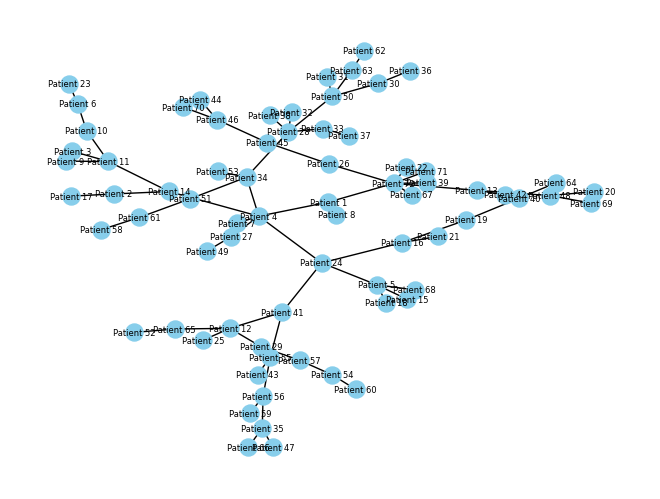

In [254]:
# Calculate the minimum spanning tree of the training dataset
mst = G.get_mst()

# Visualize the minimum spanning tree
G_nx = nx.Graph()
G_nx.add_nodes_from(mst.nodes)
G_nx.add_edges_from(mst.get_edges())
nx.draw(G_nx, with_labels=True, node_size=150, node_color='skyblue', font_size=6, font_color='black')
plt.show()


*Removing Inconsistent Edges (longest edge)*

{Patient 40, Patient 64} 114366.44004252297
{Patient 16, Patient 21} 106111.11084613147
{Patient 62, Patient 63} 104789.09539641994
{Patient 58, Patient 61} 100579.20673777458
{Patient 60, Patient 54} 92239.4398779611
{Patient 56, Patient 59} 89301.68593593292
{Patient 65, Patient 52} 88500.89498982482
{Patient 36, Patient 30} 86763.62609988128
{Patient 48, Patient 20} 86549.33824703688
{Patient 43, Patient 55} 86383.7981510422
{Patient 72, Patient 39} 85805.53193704937
{Patient 51, Patient 61} 85397.43316985587
{Patient 17, Patient 2} 83545.2472735583
{Patient 34, Patient 53} 82573.94903357838
{Patient 50, Patient 63} 80358.11438803178
{Patient 28, Patient 38} 79367.70526479898
{Patient 57, Patient 54} 78705.76798430977
{Patient 57, Patient 29} 78006.44295825827
{Patient 33, Patient 37} 76670.64361279354
{Patient 35, Patient 47} 76272.83372866122
{Patient 34, Patient 51} 75392.51146499896
{Patient 9, Patient 11} 74807.9503061005
{Patient 10, Patient 6} 74482.48591447523
{Patient 18, P

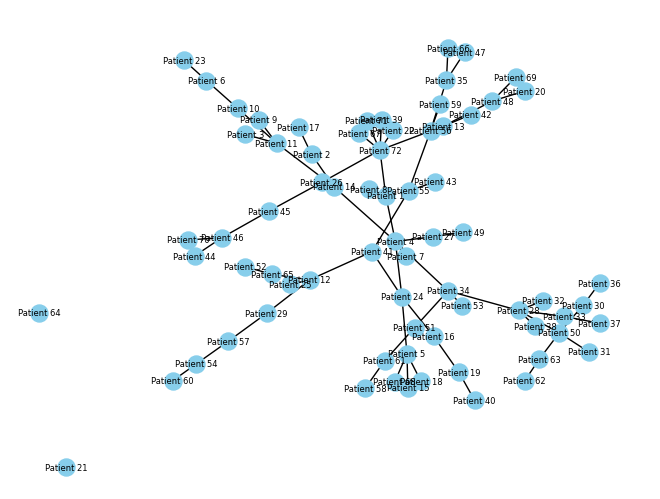

In [255]:
# Remove k longest edges from MST
mst_edges = mst.get_edges()
mst_edges.sort(key=lambda x: G.adjacency_matrix[G.nodes.index(list(x)[0])][G.nodes.index(list(x)[1])], reverse=True)
for edge in mst_edges:
    print(edge, G.adjacency_matrix[G.nodes.index(list(edge)[0])][G.nodes.index(list(edge)[1])])
mst.remove_edge(list(mst_edges[0])[0], list(mst_edges[0])[1])
mst.remove_edge(list(mst_edges[1])[0], list(mst_edges[1])[1])

# Print the removed edges
print('Removed: ', mst_edges[0], ' and ', mst_edges[1])

# Visualize the k Clusters
G_nx = nx.Graph()
G_nx.add_nodes_from(mst.nodes)
G_nx.add_edges_from(mst.get_edges())
nx.draw(G_nx, with_labels=True, node_size=150, node_color='skyblue', font_size=6, font_color='black')
plt.show()
